# Notes

#### KLD
 - ~~Plot de l’évolution des KLD sur la base des entraînements existants~~
 - ~~Pour entraînement KLD : montrer courbe validation~~, jouer sur le learning rate? ~~Verifier que la KLD diminue sur une epoch.~~

 
 
#### To do
 - ~~correction du plot evolution temporelle sous schema eulerien.~~
 - ~~travail sur conservation de la masse : essai : terme de loss additionnel~~
 - ~~refaire courbe evolution de loss avec même mse ()~~
 - ~~faire exp. avec architecture stackée sur t —> t+1~~

In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sf
from IPython import display
import math as mt
import matplotlib.animation as animation
import xarray as xr
import seaborn as sns
sns.reset_defaults()
sns.set_context("talk", font_scale=0.8)
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

In [2]:
import myfuncts 
def rmse(y1, y2):                                                                                                                                                                                   
    return np.sqrt(((y1-y2)**2)).mean()  

ds=myfuncts.load_5d()

pred0=rmse(ds[-1,1,:,:],0*ds[-1,1,:,:])
gt, ml, ml12, eul=myfuncts.load_eul()
gt_, eul_, ml_, ml12_=myfuncts.load_eulp()

# fix Eulerian plot

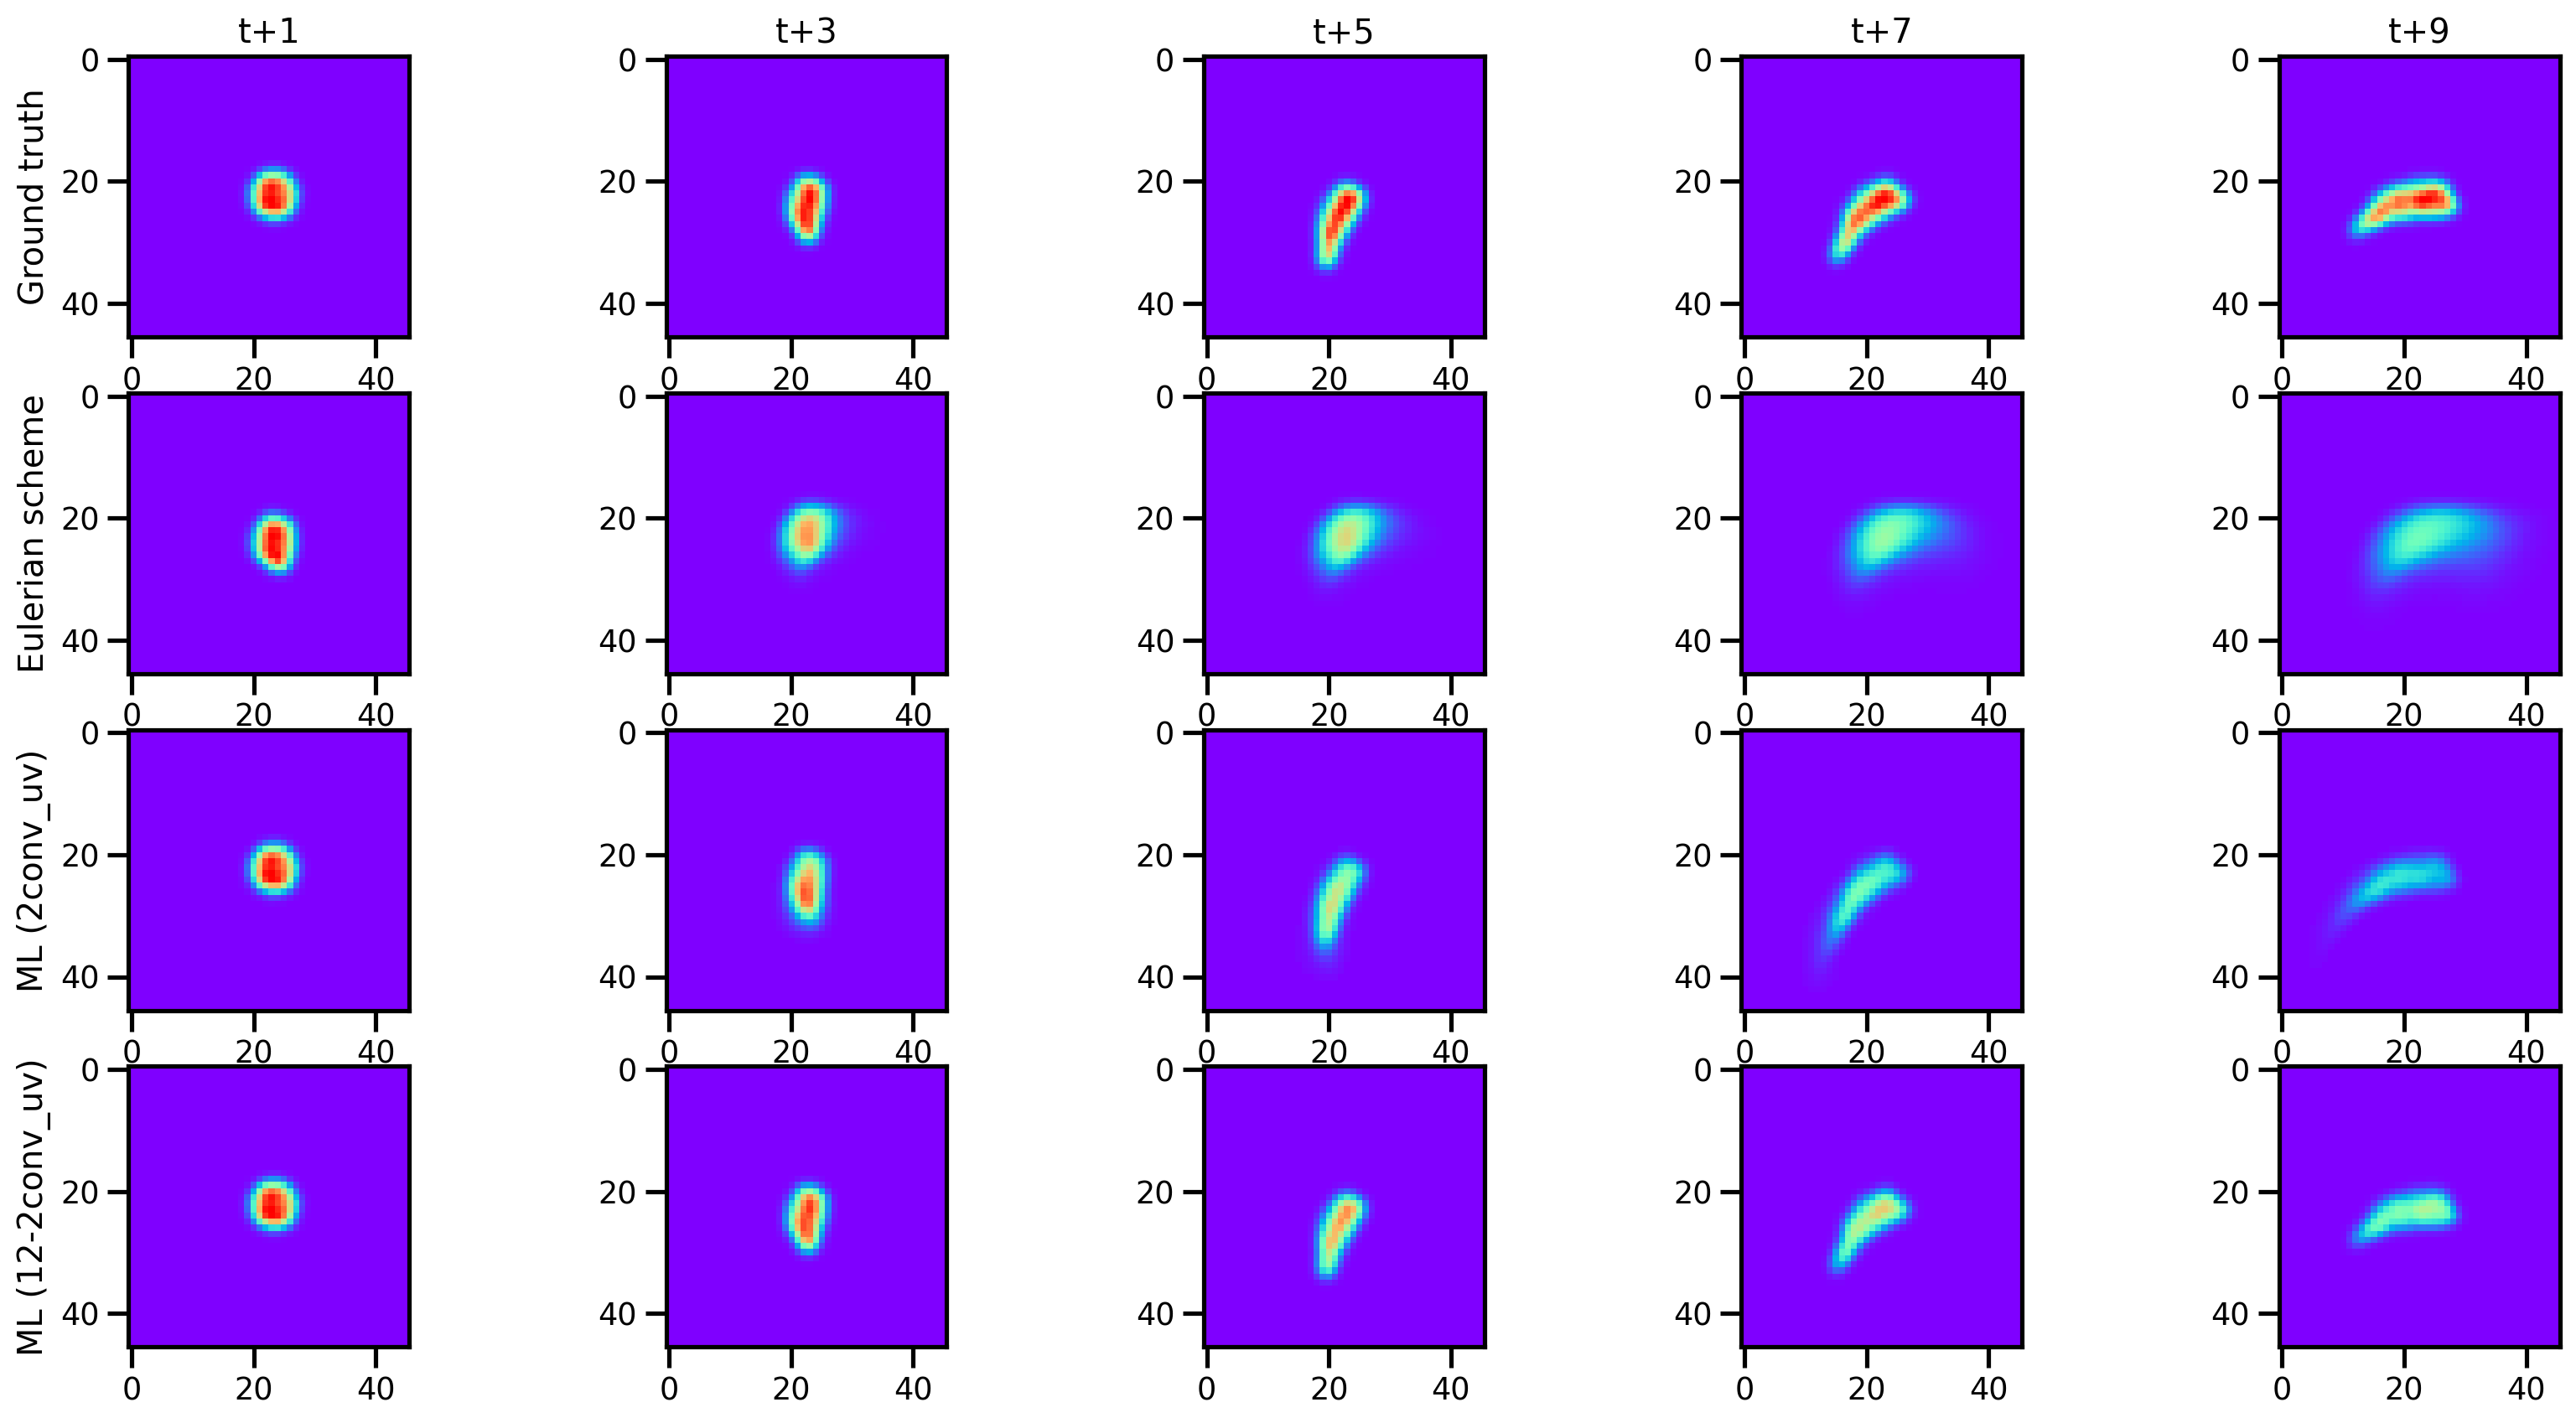

In [4]:
import matplotlib.cm as cm                                                                                                                                                                          
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20,10))
axs.shape


k=23
for j in range(5):
    i=2*j
    ind = np.unravel_index(np.argmax(eul[i], axis=None), eul[i].shape)
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    #print(ind)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow)
    axs[1,j].imshow(eul[i,ind[0]-k:ind[0]+k,ind[1]-k:ind[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[2,j].imshow(ml[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[3,j].imshow(ml12[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('Eulerian scheme')
axs[2,0].set_ylabel('ML (2conv_uv)')
axs[3,0].set_ylabel('ML (12-2conv_uv)')
plt.show()

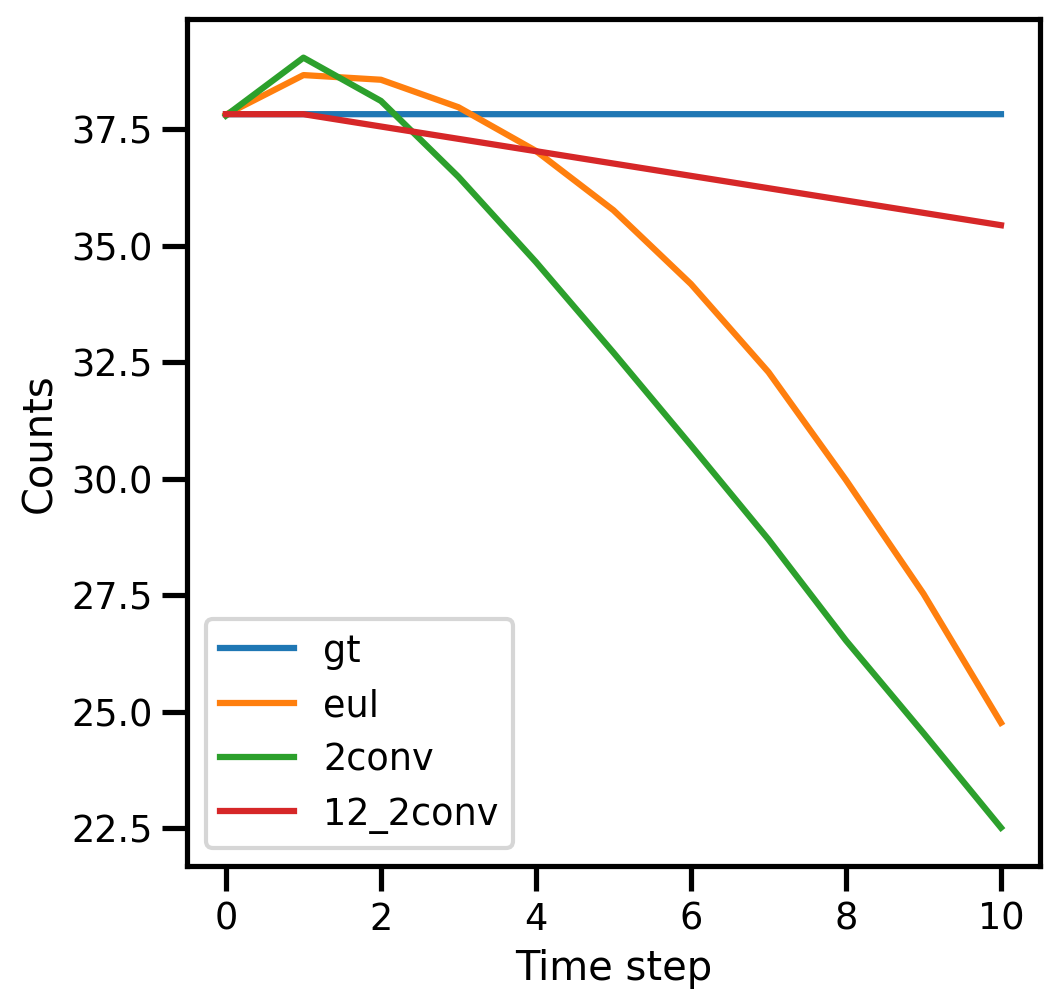

In [5]:
gt_, eul_, ml_, ml12_=myfuncts.load_eulp()
plt.rcParams["figure.figsize"] = [5.50, 5.50]
plt.plot(gt_, label='gt')
plt.plot(eul_, label='eul')
plt.plot(ml_, label='2conv')
plt.plot(ml12_, label='12_2conv')
    #print(sim.name)
plt.ylabel('Counts')
plt.xlabel('Time step')
plt.legend()

plt.show()


# Redo the evolution losses with the same MSE()

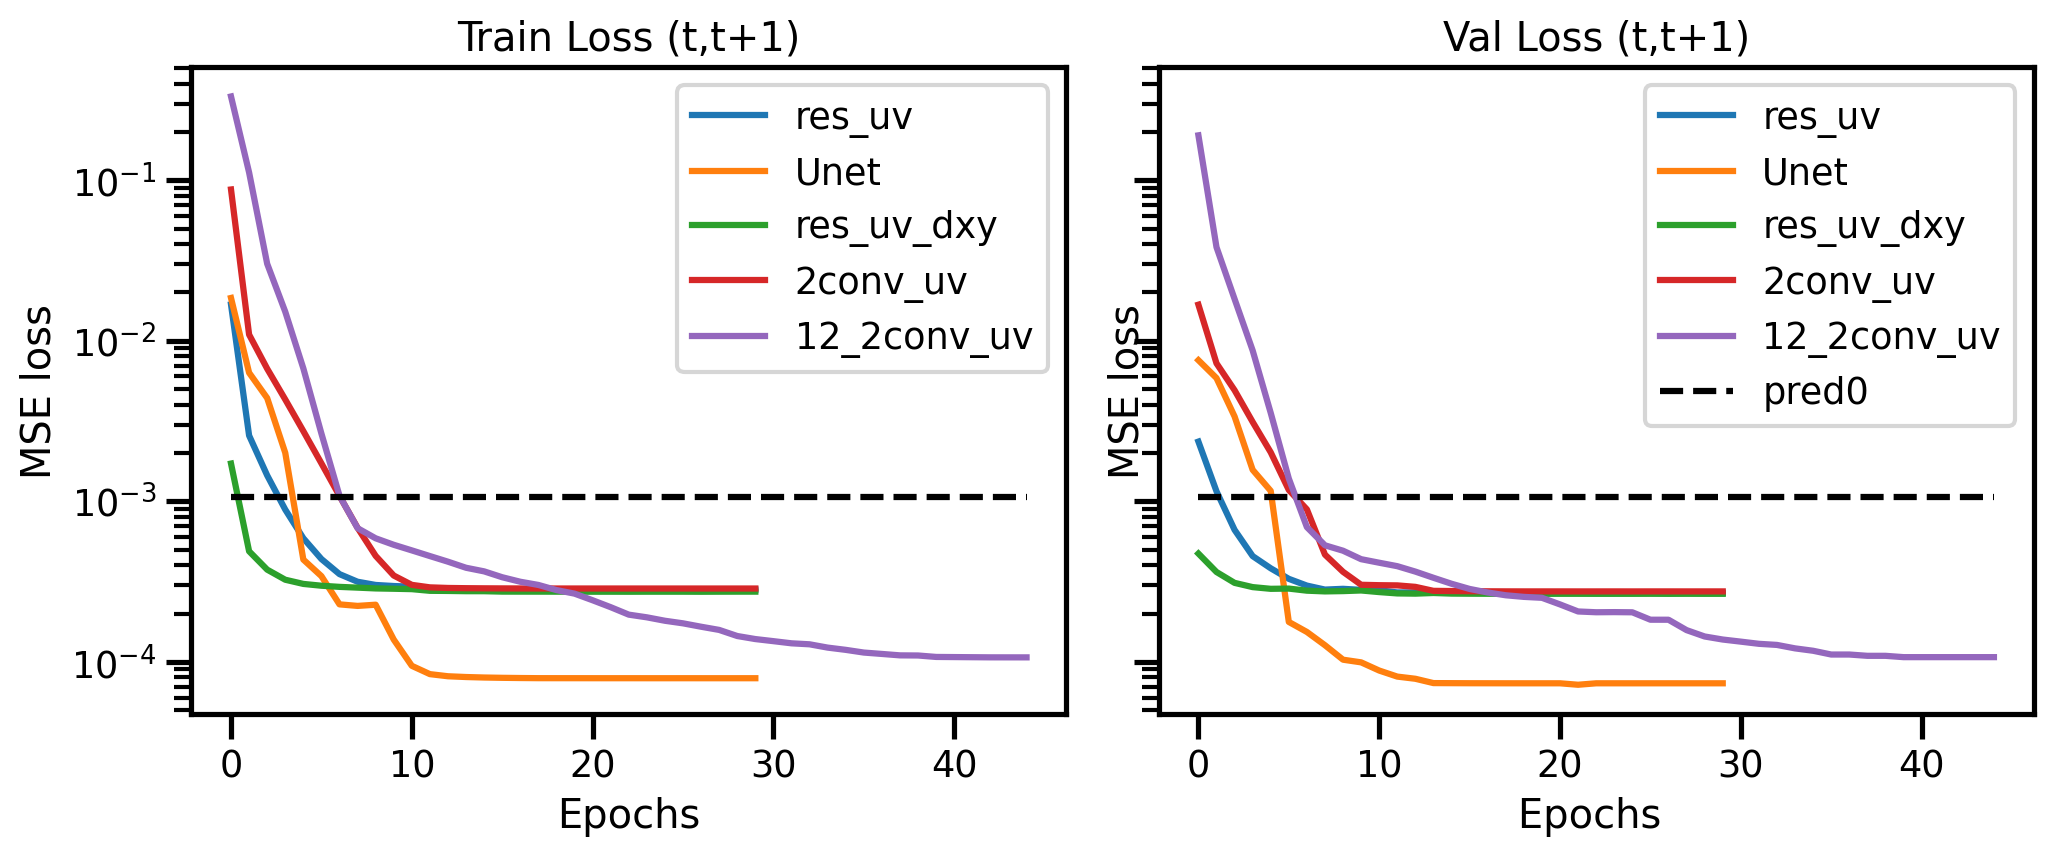

In [3]:
import myfuncts 

sims=myfuncts.load_sims5()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 0.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for sim in sims:
        ax1.plot((sim.tloss/norm),label=sim.name)
        ax2.plot((sim.vloss/norm),label=sim.name)
        #print(sim.name +' :', sim.tloss[29])
        
ax1.title.set_text('Train Loss (t,t+1)')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax2.plot(((pred0+0*sim.tloss)/norm),'k--',label='pred0')
ax1.plot(((pred0+0*sim.tloss)/norm),'k--',label='pred0')

ax2.title.set_text('Val Loss (t,t+1)')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')
ax2.legend()
#ax2.set_yscale('log')
#ax2.set_xscale('log')
#ax2.set_xlim([20, 45])
plt.tight_layout()
plt.show()

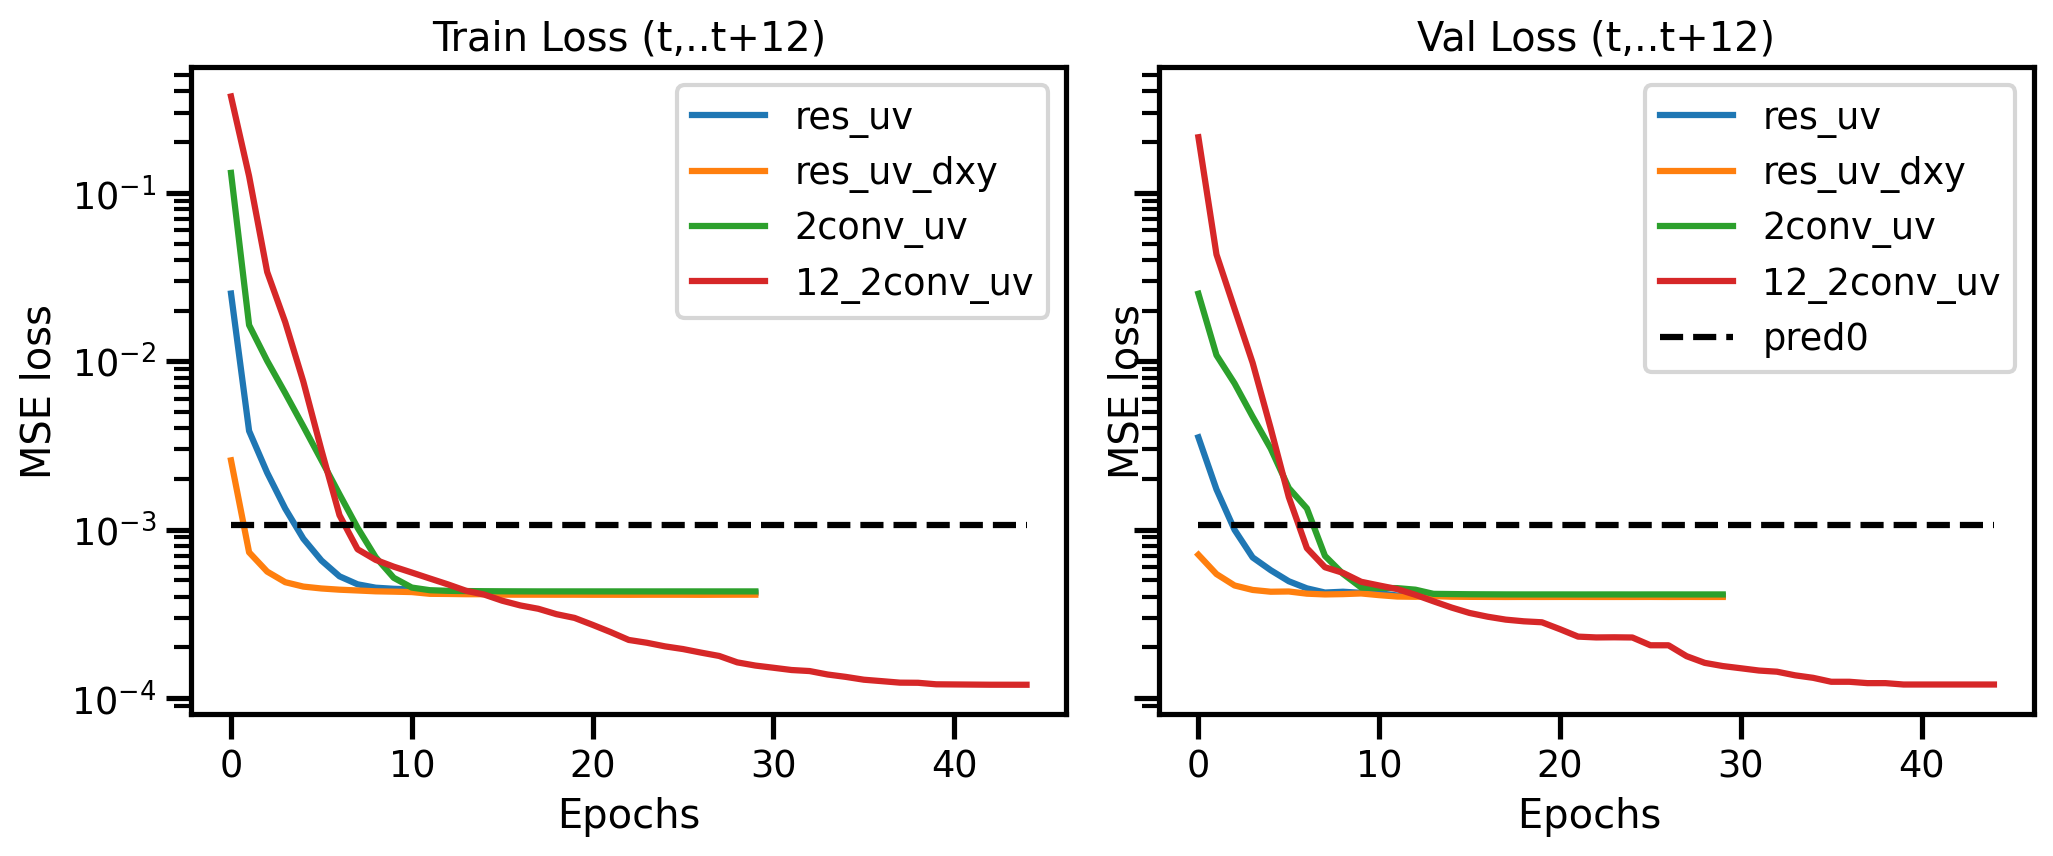

In [4]:
sims=myfuncts.load_sims6()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 0.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for sim in sims:
        ax1.plot((sim.tloss/norm),label=sim.name)
        ax2.plot((sim.vloss/norm),label=sim.name)
        #print(sim.name +' :', sim.tloss[29])
        
ax1.title.set_text('Train Loss (t,..t+12)')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax2.plot(((pred0+0*sim.tloss)/norm),'k--',label='pred0')
ax1.plot(((pred0+0*sim.tloss)/norm),'k--',label='pred0')

ax2.title.set_text('Val Loss (t,..t+12)')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')
ax2.legend()
#ax2.set_yscale('log')
#ax2.set_xscale('log')
#ax2.set_xlim([20, 45])
plt.tight_layout()
plt.show()

# KLD  from MSE experiences vs KLD from KLD experience


2cnv_uv_kld
res_uv_km
2cnv_uv_km
12_2cnvs_km


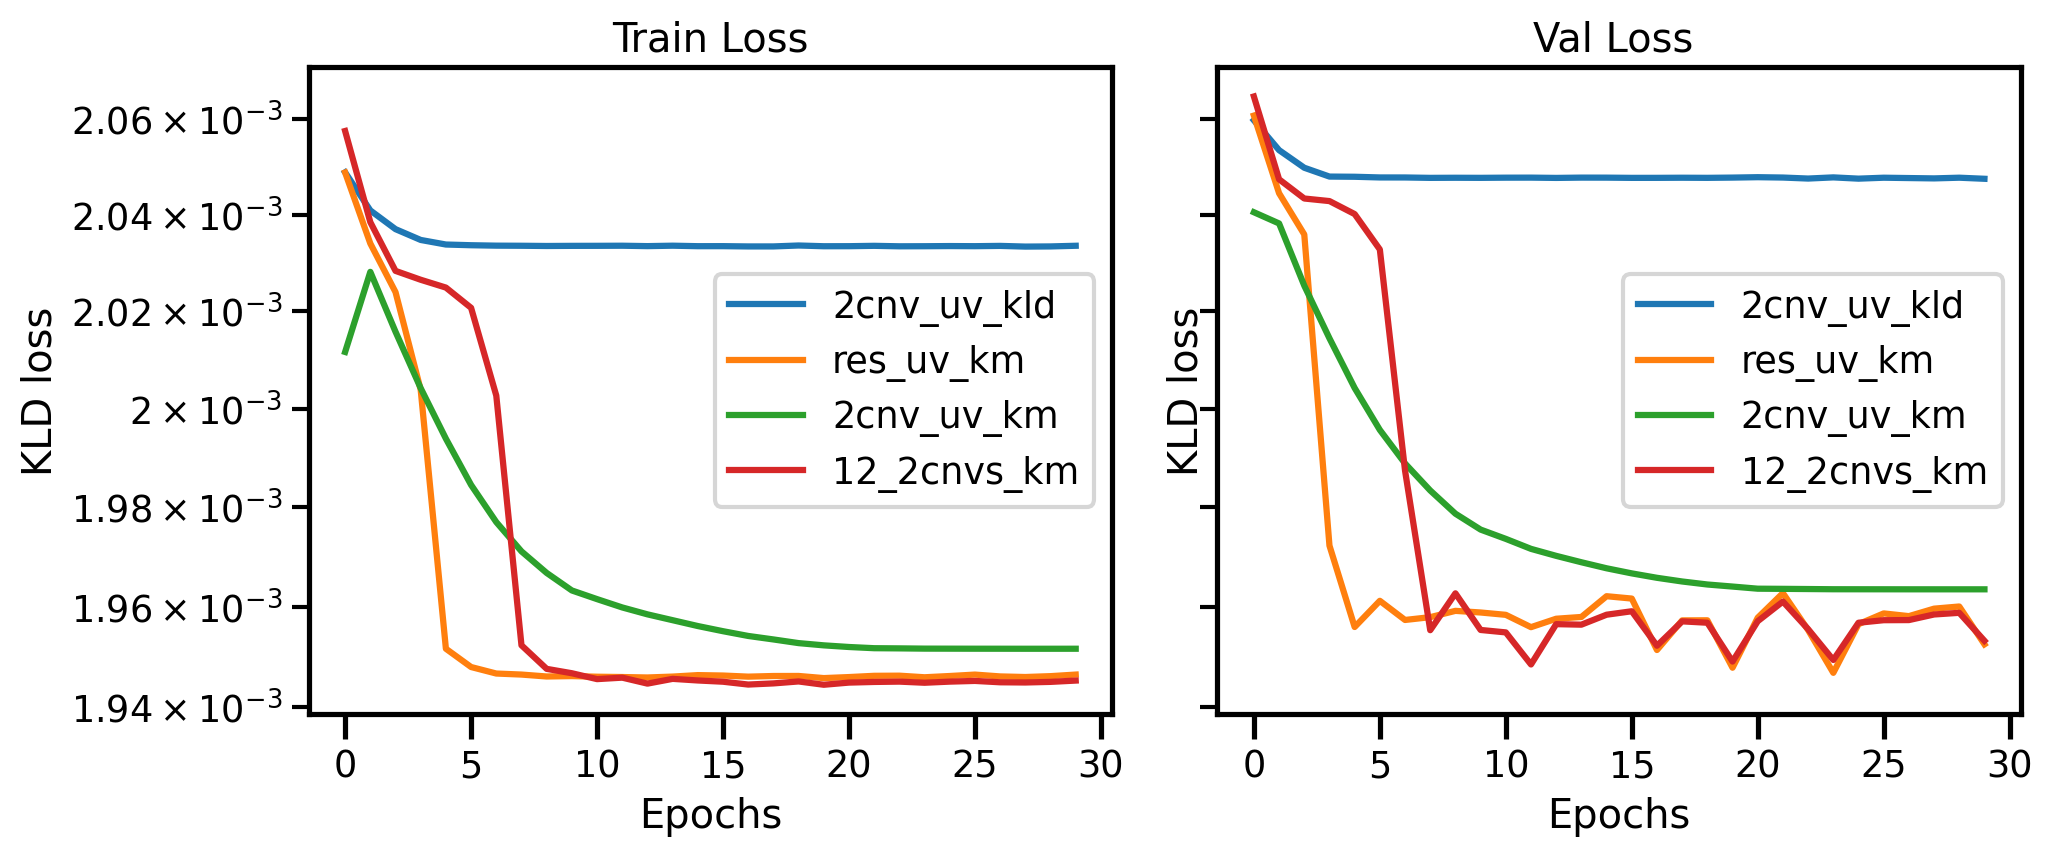

In [5]:
import myfuncts 

sims=myfuncts.load_sims7()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 0.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for sim in sims:
        ax1.plot((sim.tloss),label=sim.name)
        ax2.plot((sim.vloss),label=sim.name)
        
ax1.title.set_text('Train Loss')
ax1.set_ylabel('KLD loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')
#ax1.set_xscale('log')

ax2.title.set_text('Val Loss ')
ax2.set_ylabel('KLD loss')
ax2.set_xlabel('Epochs')
ax2.legend()
#ax2.set_yscale('log')
#ax2.set_xscale('log')
#ax2.set_xlim([20, 45])
plt.tight_layout()
plt.show()

# Train with additional loss term $\Sigma Pi $

* 6S_2cn_uv referes to new stacked arch (t,t+1) 

* _NL= refers to models trained with mse+$\Sigma Pi $



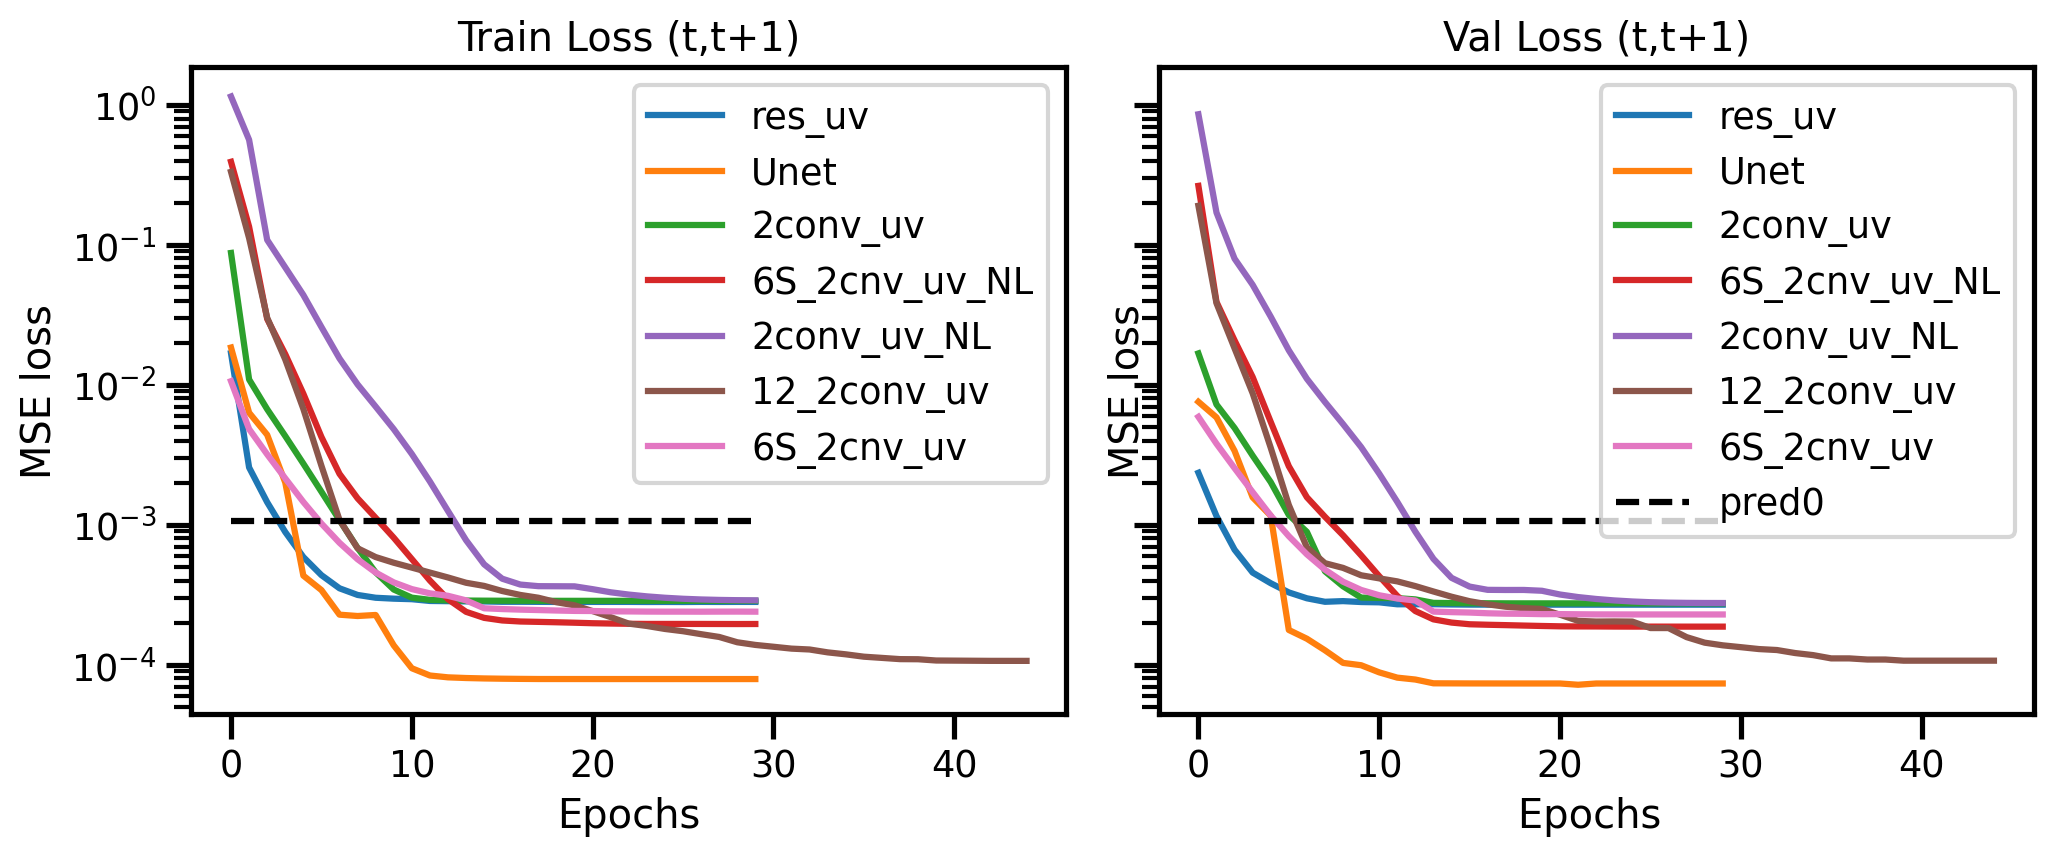

In [6]:
import myfuncts 

sims=myfuncts.load_sims5_1()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 0.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for sim in sims:
        ax1.plot((sim.tloss/norm),label=sim.name)
        ax2.plot((sim.vloss/norm),label=sim.name)
        #print(sim.name +' :', sim.tloss[29])
        
ax1.title.set_text('Train Loss (t,t+1)')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax2.plot(((pred0+0*sim.tloss)/norm),'k--',label='pred0')
ax1.plot(((pred0+0*sim.tloss)/norm),'k--',label='pred0')

ax2.title.set_text('Val Loss (t,t+1)')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')
ax2.legend()
#ax2.set_yscale('log')
#ax2.set_xscale('log')
#ax2.set_xlim([20, 45])
plt.tight_layout()
plt.show()

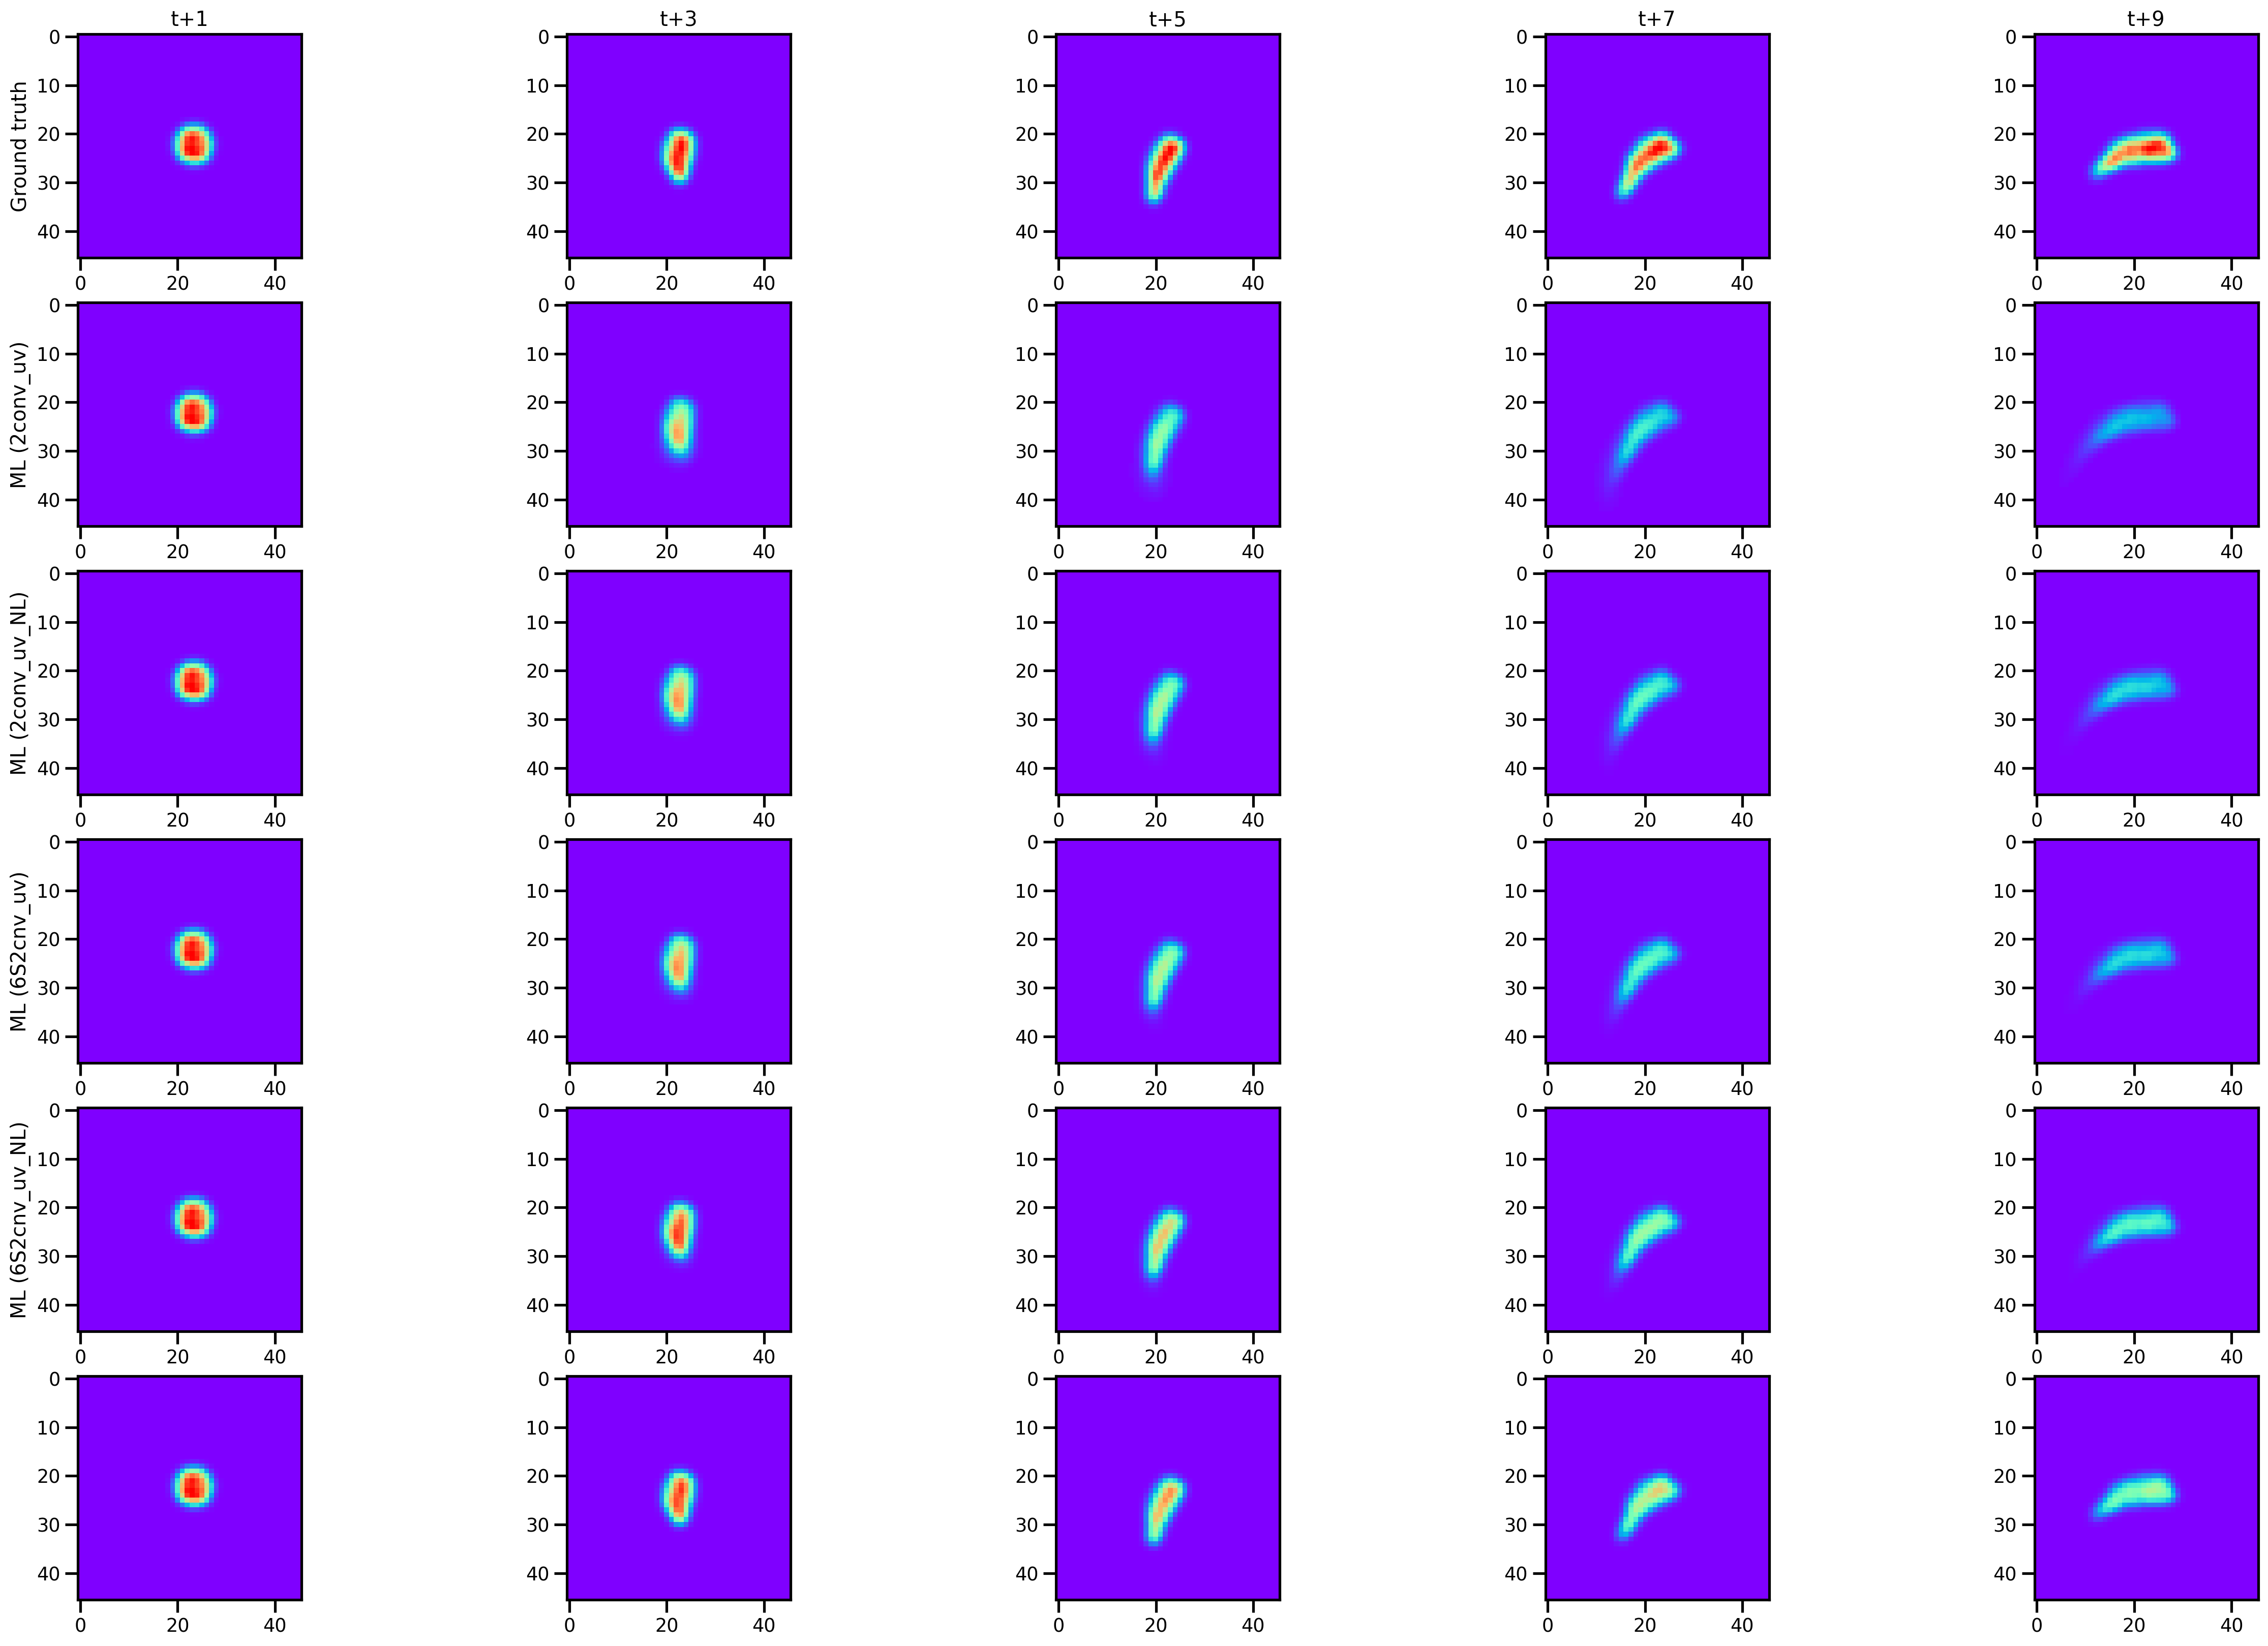

In [107]:
import matplotlib.cm as cm             

gt, ml, ml12, ml2cN, ml62c, ml62cN=myfuncts.load_snaps()

fig, axs = plt.subplots(ncols=5, nrows=6, figsize=(30,20))
axs.shape


k=23
for j in range(5):
    i=2*j
    ind = np.unravel_index(np.argmax(eul[i], axis=None), eul[i].shape)
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    #print(ind)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow)
    axs[1,j].imshow(ml[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[2,j].imshow(ml2cN[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[3,j].imshow(ml62c[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[4,j].imshow(ml62cN[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[5,j].imshow(ml12[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=1)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ML (2conv_uv)')
axs[2,0].set_ylabel('ML (2conv_uv_NL)')
axs[3,0].set_ylabel('ML (6S2cnv_uv)')
axs[4,0].set_ylabel('ML (6S2cnv_uv_NL)')
plt.show()

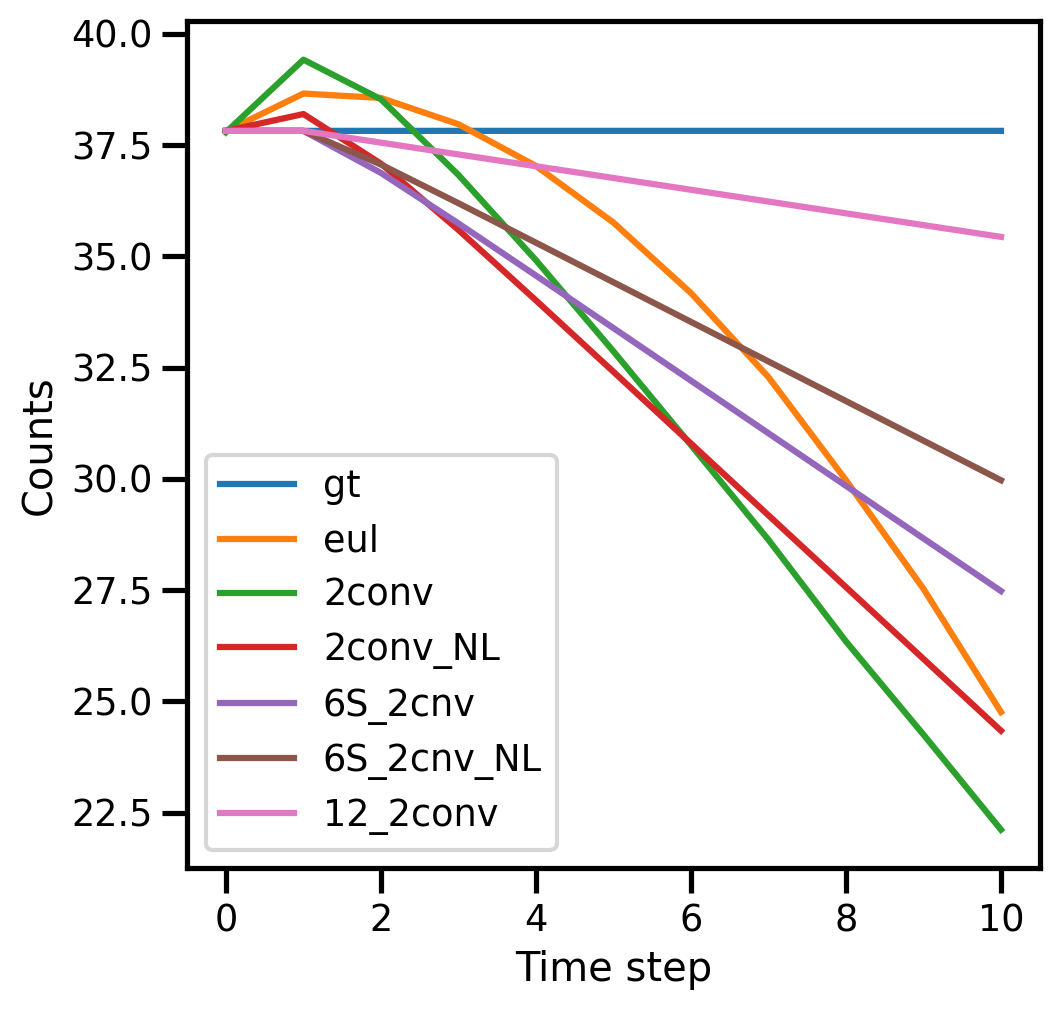

In [128]:
gt_, ml_, ml12_, ml2cN_, ml62c_, ml62cN_=myfuncts.load_snapsp()
plt.rcParams["figure.figsize"] = [5.50, 5.50]
plt.plot(gt_, label='gt')
plt.plot(eul_, label='eul')
plt.plot(ml_, label='2conv')
plt.plot(ml2cN_, label='2conv_NL')
plt.plot(ml62c_, label='6S_2cnv')
plt.plot(ml62cN_, label='6S_2cnv_NL')
plt.plot(ml12_, label='12_2conv')
    #print(sim.name)
plt.ylabel('Counts')
plt.xlabel('Time step')
plt.legend()

plt.show()